/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


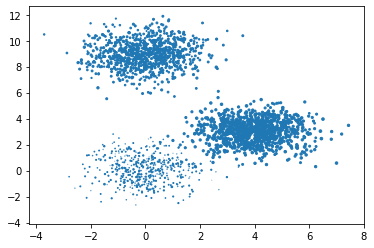

In [106]:
import numpy as np
import matplotlib.pyplot as plt


k = 3
point1 = np.array([4, 3, 5])
point2 = np.array([0, 9, 3])
'''
points1 = [np.random.randn(2) for _ in range(1000)] #3차원의 값으로 랜덤하게 값 추출
points2 = [np.random.randn(2) + np.array([4, 3]) for _ in range(1000)] #np를 이용하여 중심좌표 옮겨주기
print(points)
'''
points = [np.random.randn(k) for _ in range(1000)]
points.extend([np.random.randn(k) + point1 for _ in range(1000)])
points.extend([np.random.randn(k) + point2 for _ in range(1000)])
points = np.array(points) #두개의 포인트를 합쳐주고 list를 numpy형태로 바꿈

#x, y 만 다 모으기
'''
X = []
Y = []

for x, y in points:
  X.append(x)
  Y.append(y)

print(X, Y)'''

plt.scatter(*zip(*points))
#plt.scatter(*zip(*points2)) #cluster
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


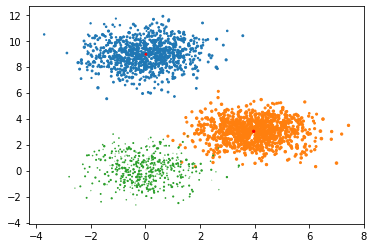

In [107]:
import random

def assign(p, centroids):
  min_l_point = -1
  min_l = 9**9
  for i, c in enumerate(centroids):
    l = np.sum((c - p)**2) #거리 비교만 하기 때문에 sqrt생략
    if (l < min_l): #현재 비교한 거리가 최소 거리보다 짧으면 
      min_l_point = i 
      min_l = l #min의 중심점과 거리를 update
  return min_l_point

def compute_centroids(k, assignments, points):
  clusters = [[] for _ in range(k)]
  for a, p in zip(assignments, points):
    clusters[a].append(p)

  centroids = [np.mean(c, axis = 0) for c in clusters]
  return centroids

def kmeans(k, points):
  pre_assignments = []
  centroids = random.choices(points, k = k)# 1. 4g : 있는 점들 중 centroids 뽑기
  #print(centroids)

  for epoch in range(10):
    print(epoch)
    # 2. 각 점마다 가까운 centroid의 cluster 할당
    assignments = []
    for p in points:
      min_idx = assign(p, centroids)
      assignments.append(min_idx) #centroids에 따라서 속한 것들을 확인
    #assignments = [assign(p, centroids)] for p in points]

    # 3. cluster의 평균을 구해서 centroid update
    # np.array([1, 2, 3]), np. array([2, 3, 4]), np.array([3, 4, 5]) ~> (a + b + c) / 3
    # cluster에 들어가있는 점 수 -> 합계 -> 합계 / 수 ( == 평균) ---- np.mean
    centroids = compute_centroids(k, assignments, points)

    # 4. cluster가 변했는지 확인 , 변했으면 계속 !!!!!!
    if (assignments == pre_assignments):
      break

    pre_assignments = assignments   
    
  return assignments, centroids #중심점과, 어느 cluster인지

ass, c = kmeans(k, points)

clusters = [[] for _ in range(k)]
for a, p in zip(ass, points):
  clusters[a].append(p)

for clst in clusters:
  plt.scatter(*zip(*clst))

#plt.scatter(*zip(*points))
plt.scatter(*zip(*c), c = "red")
plt.show()

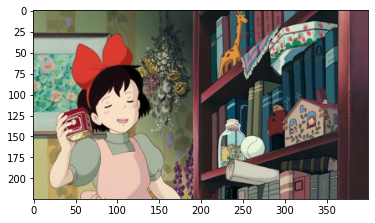

In [108]:
#img 압축하기

from PIL import Image

#img open, resize
img = Image.open("09.jpg")
width = 400
height = width * img.height // img.width

img = img.resize((width, height))

plt.imshow(img)
plt.show()

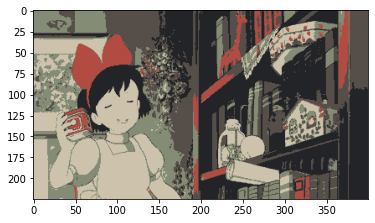

In [110]:
#numpy 형태로 변경

img_arry = np.array(img)
#img_arry

img = img_arry.reshape(400*225, 3)
img

assignment, centroid = kmeans(5, img)

for i, a in zip(range(img.shape[0]), assignment):
  img[i] = centroid[a]

img = img.reshape(225, 400, 3)
img_remastered = Image.fromarray(img, "RGB")

plt.imshow(img_remastered)
plt.show()